## 数据探索 Explore

(数据探索 / 探索性数据分析EDA Exploratory Data Analysis)

通过搜索预期的关系、未预料的趋势和异常来探索数据，以获得理解和想法。
EDA探索性数据分析和描述性统计包括统计总体数据量大小，好坏客户占比，数据类型有哪些，变量缺失率，变量频率分析直方图可视化，箱形图可视化，变量相关性可视化等。
探索性数据分析方法很多常见的有：hist直方图、scater散点图,boxer箱线图,heat热力图，pairplot配对图。

In [1]:
from westat import *

# 导入 UCI_Credit_Card
data = uci_credit_card()

# 将目标变量重命名为“y”
data.rename(columns={'target':'y'},inplace=True)

### 查看数据分布

In [3]:
# value_counts 函数默认用于查看目标变量的数据分布
value_counts(data)

,No.,Name,Value,#Count,%Ratio
0,1,y,0,23364,77.88%
1,2,y,1,6636,22.12%
2,3,Total,,30000,100.00%


In [7]:
# value_counts 函数指定需要查看的变量名称，用于该变量的数据分布
value_counts(data,col='EDUCATION')

,No.,Name,Value,#Count,%Ratio
0,1,EDUCATION,2,14030,46.77%
1,2,EDUCATION,1,10585,35.28%
2,3,EDUCATION,3,4917,16.39%
3,4,EDUCATION,5,280,0.93%
4,5,EDUCATION,4,123,0.41%
5,6,EDUCATION,6,51,0.17%
6,7,EDUCATION,0,14,0.05%
7,8,Total,,30000,100.00%


### 通过图形查看数据分布

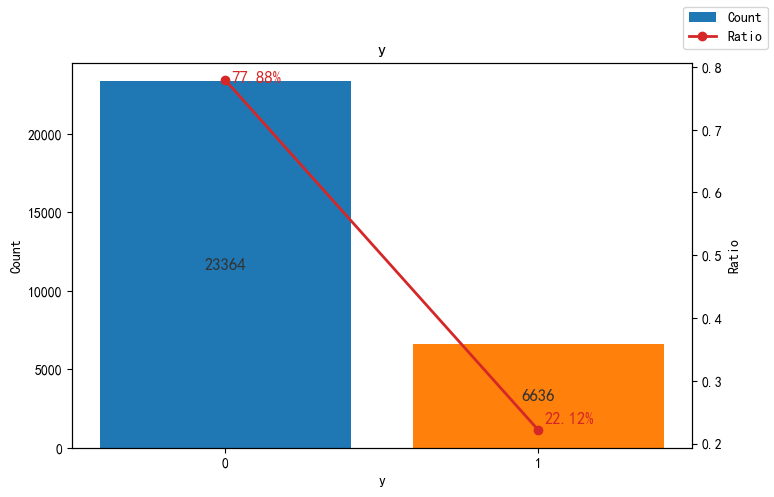

In [8]:
# plot_counts 函数默认用于查看目标变量的数据分布
plot_counts(data)

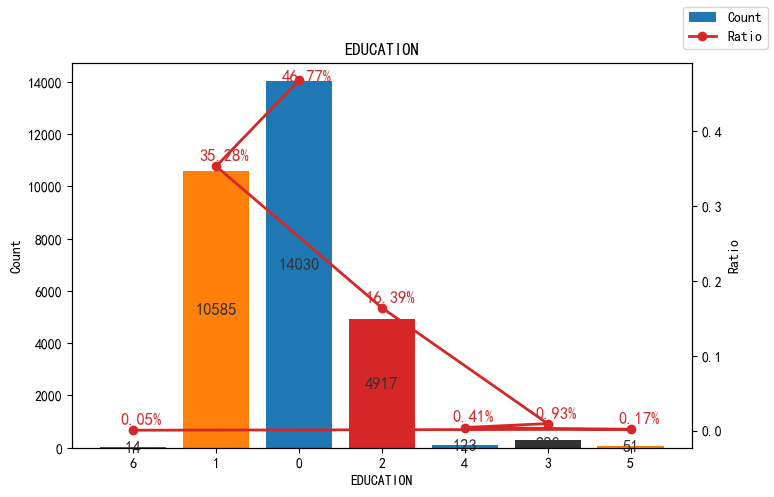

In [9]:
# plot_counts 函数指定需要查看的变量名称，用于该变量的数据分布
plot_counts(data,col='EDUCATION')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


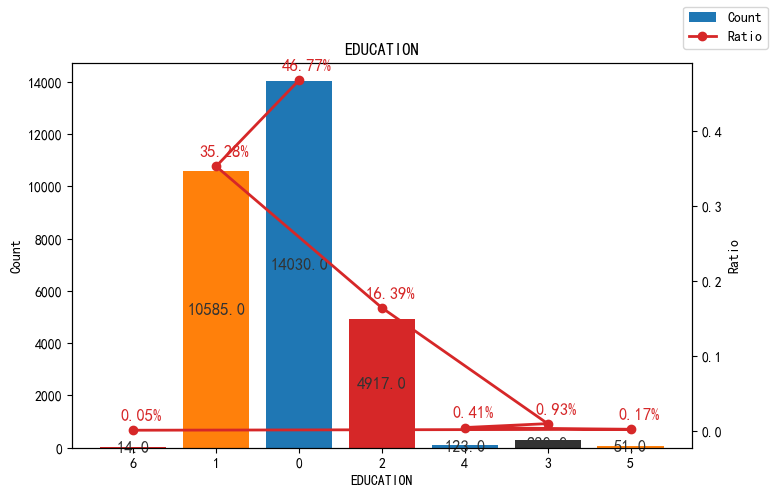

,序号,名称,值,#数量,%占比
0,1,EDUCATION,2,14030.00,46.77%
1,2,EDUCATION,1,10585.00,35.28%
2,3,EDUCATION,3,4917.00,16.39%
3,4,EDUCATION,5,280.00,0.93%
4,5,EDUCATION,4,123.00,0.41%
5,6,EDUCATION,6,51.00,0.17%
6,7,EDUCATION,0,14.00,0.05%
7,Total,,,30000.00,100.00%


In [43]:
def plot_counts(data: pd.DataFrame,
             col: str = 'y',
             missing: list = [np.nan, None, 'nan','null','NULL'],
             color: list = ['#1f77b4', '#ff800b', '#d62728', '#333333'],
             marker: str = 'o',
             linewidth: int = 2,
             linestyle: str = '-',
             style='default',
             figsize: tuple = (8, 5),
             return_data: bool = False,
             precision: int = 2,
             language='en'):
    """
    绘图展示指定列在数据集中的分布情况，例如每个取值的数量、占比
    Args:
        data: DataFrame,需要检查数据分布的数据集
        col: str,需要检查的列名
        missing: list,缺失值列表
        color: 条形图颜色名称,默认为['#1f77b4', '#ff800b', '#d62728', '#333333'],
        marker: 折线图标记样式，默认为o，即圆点
        linewidth: 折线图的线宽，默认为1
        linestyle: 折线图中线的类型，默认为 '-'
        style: 绘图的样式风格
        figsize: 图片大小，默认为(8,5)
        return_data: bool,是否返回计算结果数据
        precision: int,数据精度，小数点位数，默认为2
        language: str,数据结果标题列显示语言，默认为 'en',可手动修改为'cn'

    Returns:
        绘图展示指定列在数据集中的分布情况
    """
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

    result = get_data_distribution(data,col=col,precision=precision,language=language)
    plot_result =result.iloc[:-1, :]

    x = pd.to_numeric(result.iloc[:,2])
    y = pd.to_numeric(result.iloc[:,3])
    z = pd.to_numeric(result.iloc[:,4].apply(lambda x: (x[:-1]))) / 100

    fig = plt.figure(figsize=figsize)
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.bar(x, y, bottom=0, align='center', color=color, label='Count')

    # 设置计数标签
    for a, b, c in zip(x, y, y):
        ax1.text(a, b / 2, b, ha='center', va='center', fontsize=12, color=color[3])

    ax1.set_title(col)
    ax1.set_xticks(x, result.index)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count')

    ax2 = ax1.twinx()
    ax2.plot(x, z, marker=marker,
             color=color[2],
             linewidth=linewidth,
             linestyle=linestyle,
             label='Ratio')
    ax2.set_ylabel('Ratio')

    # 设置比例标签
    for a, b in zip(x, z):
        if b < 0:
            p = b - z.max() / 100
        elif b == z.max():
            p = b - z.max() / 100
        else:
            p = b + z.max() / 100

        ax2.text(a + 0.1, p, format(b, '.2%'), ha='center', va='bottom', fontsize=12, color=color[2])

    fig.legend(loc=1)
    plt.show()

    # 返回数据结果
    if return_data:
        return result
    
plot_counts(data,col='EDUCATION',return_data=True,language='cn')

In [44]:
def get_data_distribution(data: pd.DataFrame,
                          col='y',
                          by=['#Count', 'Name'],
                          ascending=[False, False],
                          precision=2,
                          language='en') -> pd.DataFrame:
    """
    查看数据集data中col列的数据分布情况
    Args:
        data:DataFrame,需要检查数据分布的数据集
        by:list,根据指定列进行排序，默认根据数量（降序）、名称（升序）排序
        ascending:list,指定列对应的排序列表
        col:需要检查数据分布的列，默认为'y'
        display:bool,是否显示详细信息
        precision:数据精度，默认为2位小数
        language:显示语言，en：显示为英文，cn：显示为中文
    Returns:
        返回包含数据量、数据占比的数据集
    """
    result = pd.DataFrame(data=data[col].value_counts())
    result.columns = ['count']
    result['%Ratio'] = result['count'] / len(data)
    result['Value'] = result.index
    result['Name'] = col
    result = result.rename(columns={'count': '#Count'})
    result = result[['Name', 'Value', '#Count', '%Ratio']]

    # 排序
    result.sort_values(by=by, ascending=ascending, inplace=True)
    
    # 添加汇总行
    total = result.iloc[:, 1:].apply(lambda x: x.sum())
    row = pd.DataFrame([''] + total.to_list()).T
    row.columns = result.columns
    result = pd.concat([result, row], ignore_index=True)

    result.reset_index(drop=True, inplace=True)
    result['No.'] = result.index + 1
    

    # 数据精度设置
    result['#Count'] = result['#Count'].apply(lambda x: format(x, '.' + str(precision) + 'f'))
    result['%Ratio'] = result['%Ratio'].apply(lambda x: format(x, '.' + str(precision) + '%'))
    
    result = result[['No.', 'Name', 'Value', '#Count', '%Ratio']]
    result.iat[-1,0] = 'Total'
    result.iat[-1,1] = ''
    result.iat[-1,2] = ''
    

    # 标题栏语言设置
    if language == 'cn':
        result.rename(columns={'No.': '序号', 'Name': '名称', 'Value': '值', '#Count': '#数量', '%Ratio': '%占比'},
                        inplace=True)


    return result

df=get_data_distribution(data,precision=4,language='cn')